<a href="https://colab.research.google.com/github/pemarathna/Deep-Learning-project-1/blob/main/DL_mini_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT RELEVENT LIBRARIES**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

**MOUNT THE GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**CHANGE THE CURRENT WORKING DIRECTORY**

In [ ]:
os.chdir("/content/drive/My Drive/letter/")
os.getcwd()

'/content/drive/My Drive/letter'

**LOAD AND DISPLAY A IMAGE FROM A SPECIFIED PATH**

In [ ]:

img = image.load_img("training/m/1.jpeg")

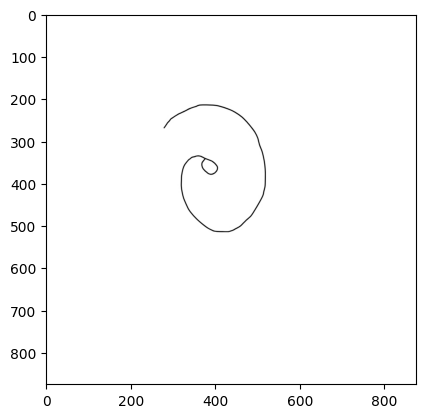

In [ ]:

plt.imshow(img)

In [ ]:

cv2.imread("training/m/1.jpeg").shape

(875, 875, 3)

In [ ]:

train = ImageDataGenerator(rescale = 1/255)

validation = ImageDataGenerator(rescale = 1/255)

**CREATE TRAINING AND VALIDATION DATASETS USING ImageDataGenerator**

In [ ]:

train_dataset = train.flow_from_directory('training/',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

validation_dataset = validation.flow_from_directory('testing/',
                                                   target_size = (200,200),
                                                   batch_size = 3,
                                                   class_mode = 'binary')

Found 87 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [ ]:

train_dataset.class_indices

{'m': 0, 'th': 1}

In [ ]:

train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

**SPECIFYING THE CNN ARCHITECTURE**

In [ ]:


model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                   # MaxPooling layer with pool size (2, 2)
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer with 32 filters, each of size (3, 3), and ReLU activation
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer with 64 filters, each of size (3, 3), and ReLU activation
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Flatten layer to convert 3D feature maps to 1D feature vectors
                                    tf.keras.layers.Flatten(),
                                   # Dense (fully connected) layer with 512 units and ReLU activation
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                   # Output layer with 1 unit and sigmoid activation for binary classification
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                    ])

In [ ]:

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy'])

**TRAINING THE MODEL**

In [ ]:

model_fit = model.fit(train_dataset,
                      steps_per_epoch = 5,
                      epochs = 30,
                      validation_data = validation_dataset)

Epoch 1/30
5/5 [==============================] - 7s 915ms/step - loss: 10.5524 - accuracy: 0.2667
Epoch 2/30
5/5 [==============================] - 4s 770ms/step - loss: 0.6911 - accuracy: 0.6000
Epoch 3/30
5/5 [==============================] - 4s 771ms/step - loss: 0.7279 - accuracy: 0.6000
Epoch 4/30
5/5 [==============================] - 4s 734ms/step - loss: 0.7290 - accuracy: 0.5333
Epoch 5/30
5/5 [==============================] - 4s 592ms/step - loss: 0.6544 - accuracy: 0.5333
Epoch 6/30
5/5 [==============================] - 4s 700ms/step - loss: 1.0531 - accuracy: 0.6000
Epoch 7/30
5/5 [==============================] - 4s 670ms/step - loss: 0.9025 - accuracy: 0.6667
Epoch 8/30
5/5 [==============================] - 3s 660ms/step - loss: 0.5652 - accuracy: 0.8000
Epoch 9/30
5/5 [==============================] - 2s 480ms/step - loss: 0.4883 - accuracy: 0.8667
Epoch 10/30
5/5 [==============================] - 2s 468ms/step - loss: 0.5877 - accuracy: 0.7333
Epoch 11/30
5/5 [=

In [ ]:
# Retrieve the mapping of class names to their indices in the validation dataset
validation_dataset.class_indices

{}

**TESTING SAMPLE DATA**

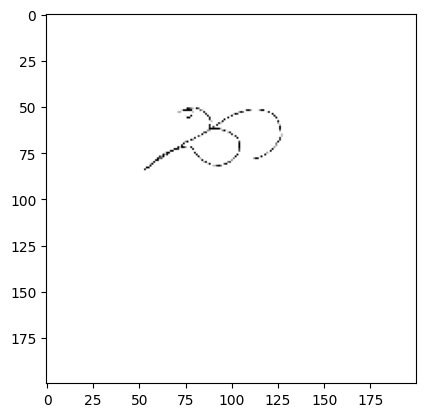

1/1 [==============================] - 0s 134ms/step
'm'


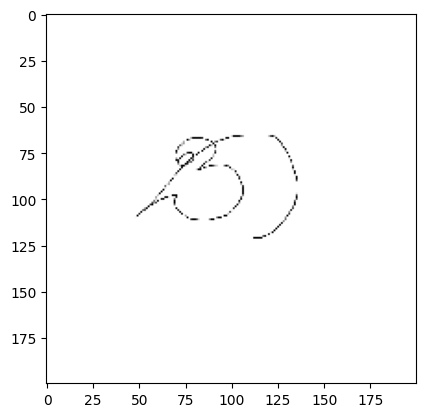

1/1 [==============================] - 0s 59ms/step
'th'


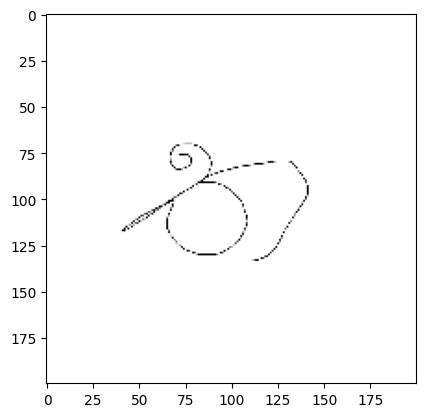

1/1 [==============================] - 0s 42ms/step
'th'


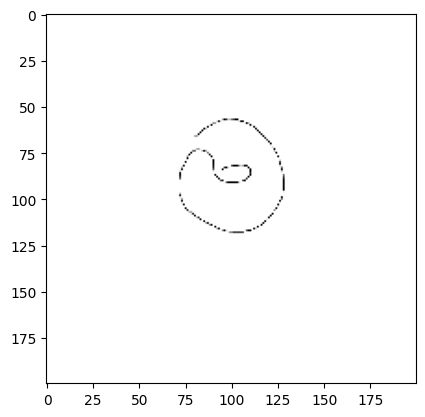

1/1 [==============================] - 0s 37ms/step
'm'


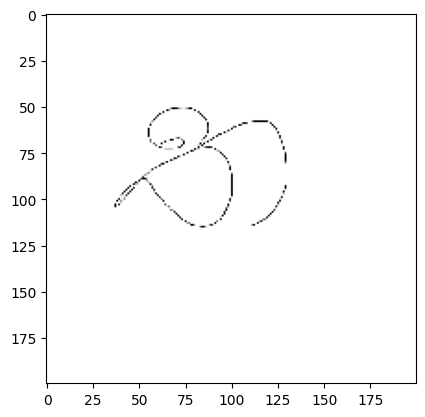

1/1 [==============================] - 0s 42ms/step
'th'


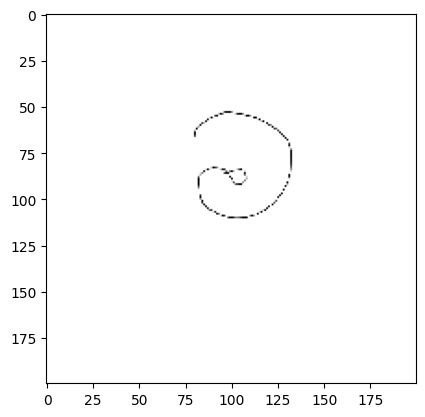

1/1 [==============================] - 0s 36ms/step
'm'


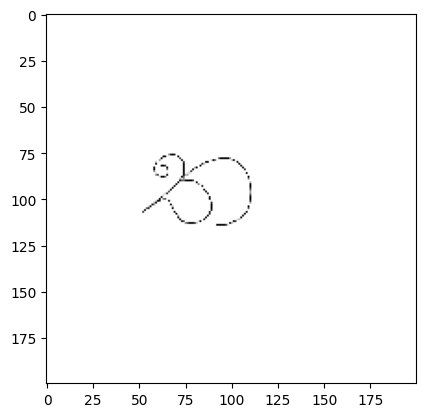

1/1 [==============================] - 0s 37ms/step
'th'


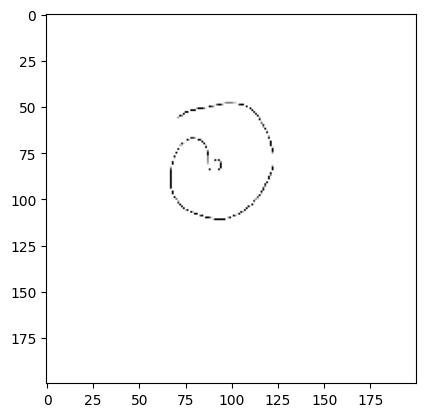

1/1 [==============================] - 0s 36ms/step
'm'


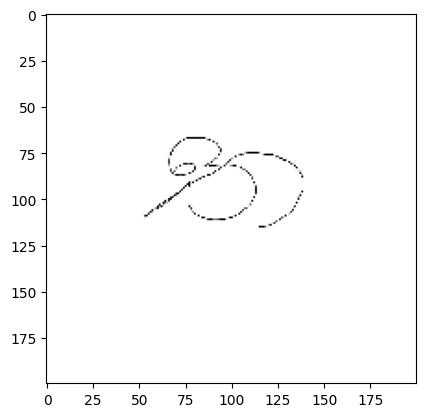

1/1 [==============================] - 0s 35ms/step
'th'


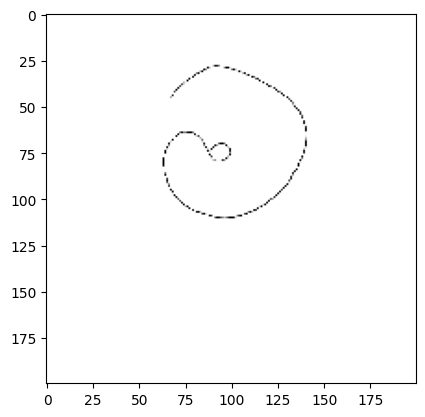

1/1 [==============================] - 0s 35ms/step
'm'


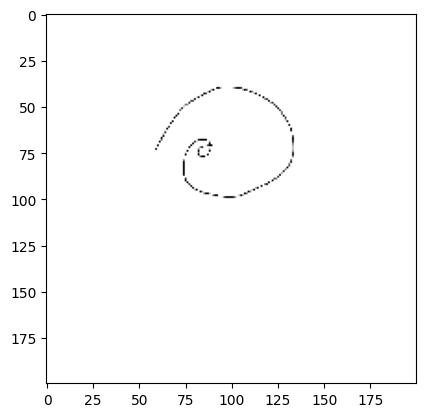

1/1 [==============================] - 0s 38ms/step
'm'


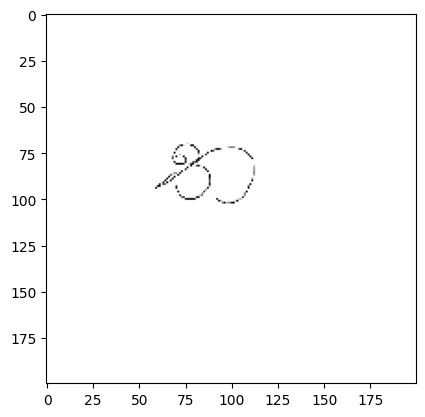

1/1 [==============================] - 0s 38ms/step
'th'


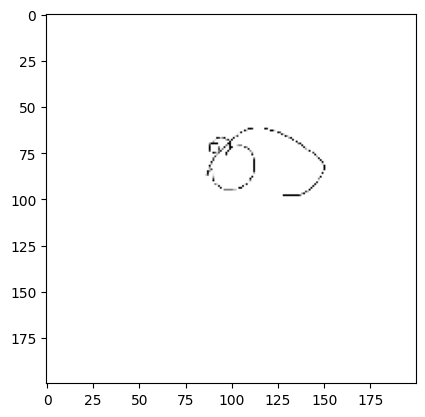

1/1 [==============================] - 0s 51ms/step
'th'


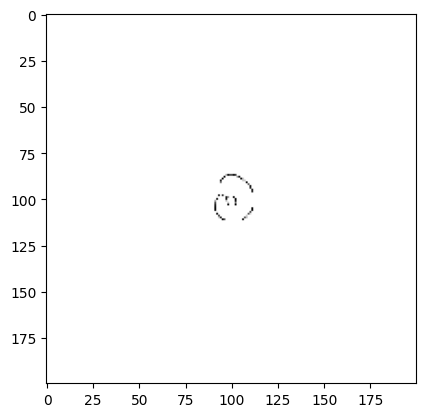

1/1 [==============================] - 0s 51ms/step
'm'


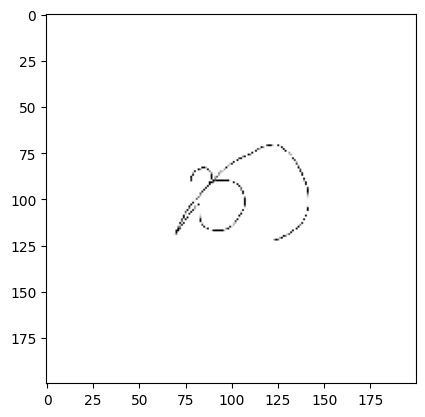

1/1 [==============================] - 0s 54ms/step
'th'


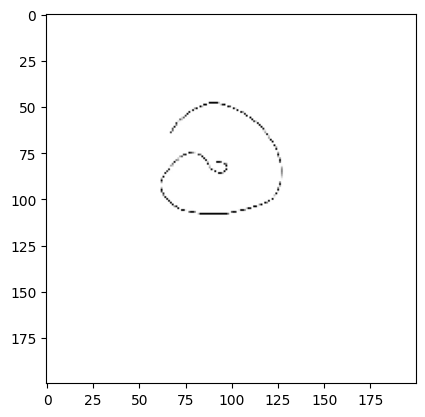

1/1 [==============================] - 0s 35ms/step
'm'


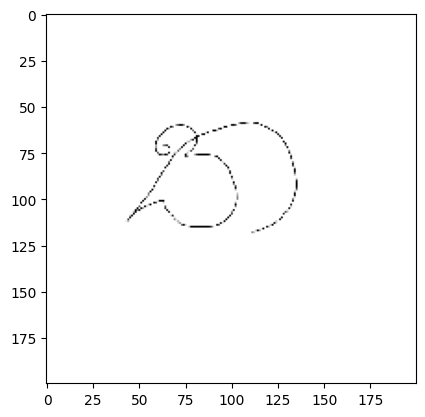

1/1 [==============================] - 0s 36ms/step
'th'


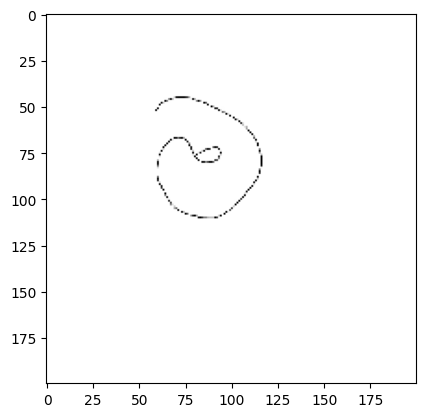

1/1 [==============================] - 0s 47ms/step
'm'


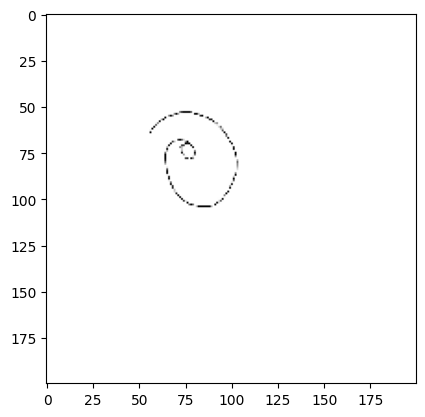

1/1 [==============================] - 0s 45ms/step
'm'


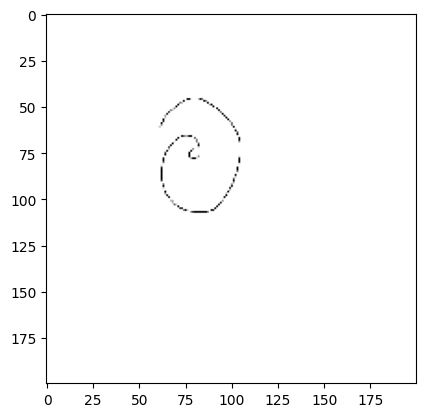

1/1 [==============================] - 0s 41ms/step
'm'


In [ ]:

dir_path = 'testing/'


for i in os.listdir(dir_path):

  img = image.load_img(dir_path+ i,target_size=(200,200))

  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X,axis = 0)

  images = np.vstack([X])

  val = model.predict(images)

  if val == 0:
    print("'m'")
  else:
    print("'th'")